In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [13]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [14]:
regr_1 = DecisionTreeRegressor(max_depth=4)

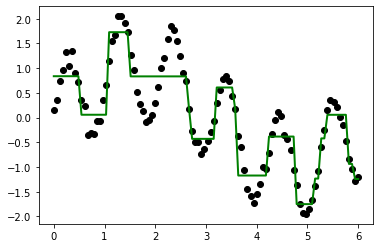

In [15]:
regr_1.fit(X, y)
#regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
#y_2 = regr_2.predict(X)

# Plot the results
#plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
#plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
#plt.xlabel("data")
#plt.ylabel("target")
#plt.title("Boosted Decision Tree Regression")
#plt.legend()

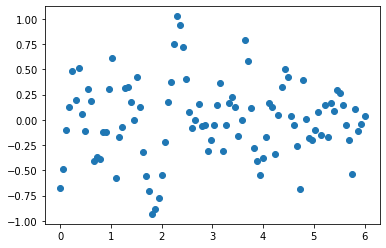

In [16]:
y_r1 = y - regr_1.predict(X)
plt.scatter(X,y_r1)

In [17]:
reg_2 = DecisionTreeRegressor(max_depth=4)
reg_2.fit(X,y_r1)

DecisionTreeRegressor(max_depth=4)

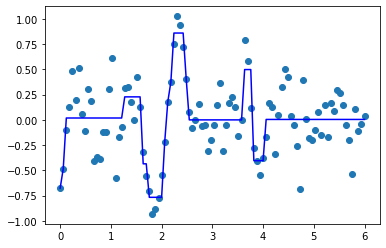

In [18]:
plt.scatter(X,y_r1)
plt.plot(X,reg_2.predict(X),'b-')

In [19]:
y_r2 = y_r1 - reg_2.predict(X)

In [20]:
reg_3 = DecisionTreeRegressor(max_depth=4)
reg_3.fit(X,y_r2)

DecisionTreeRegressor(max_depth=4)

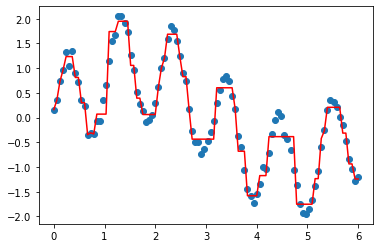

In [21]:
plt.scatter(X,y)
plt.plot(X,regr_1.predict(X)+reg_2.predict(X)+reg_3.predict(X),'r-')

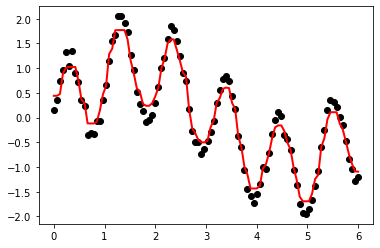

In [22]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_2.fit(X, y)
y_2 = regr_2.predict(X)

plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)